In [3]:
import numpy as np
import pandas
from scipy import stats
import matplotlib.pyplot as pyplot

from pbil import pbil, population_evaluation
%matplotlib inline

In [4]:
image = pandas.read_csv("data/ImageRawReduced.txt", sep="\s+", header=None)

In [5]:
print(image.head())

   0     1     2     3     4     5     6     7     8     9     ...   9340  \
0  26.0  29.0  33.0  34.0  33.0  27.0  30.0  26.0  30.0  29.0  ...   37.0   
1  16.0  23.0  24.0  28.0  22.0  21.0  25.0  17.0  21.0  19.0  ...   27.0   
2  75.0  68.0  86.0  87.0  81.0  71.0  76.0  78.0  90.0  74.0  ...   23.0   

   9341  9342  9343  9344  9345  9346  9347  9348  9349  
0  39.0  42.0  38.0  35.0  36.0  36.0  34.0  31.0  41.0  
1  30.0  30.0  26.0  25.0  26.0  26.0  22.0  26.0  30.0  
2  26.0  25.0  22.0  21.0  22.0  21.0  20.0  25.0  23.0  

[3 rows x 9350 columns]


In [6]:
image_expert = pandas.read_csv("data/ImageExpertReduced.txt", sep="\s+", header=None)

In [7]:
print(image_expert.head())

   0     1     2     3     4     5     6     7     8     9     ...   9340  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...    3.0   

   9341  9342  9343  9344  9345  9346  9347  9348  9349  
0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0  

[1 rows x 9350 columns]


In [8]:
classification_rules = pandas.read_csv("data/ClassificationRules.txt", sep="\s+", header=None)

In [9]:
print(classification_rules.head())

   0     1     2     3     4     5     6     7     8     9     ...   9340  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...    1.0   
1   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...    3.0   
2   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...    2.0   
3   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...    2.0   
4   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...    2.0   

   9341  9342  9343  9344  9345  9346  9347  9348  9349  
0   3.0   3.0   1.0   1.0   1.0   1.0   1.0   1.0   3.0  
1   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0  
2   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0  
3   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0  
4   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0  

[5 rows x 9350 columns]


In [10]:
print(classification_rules.shape)

(266, 9350)


In [11]:
print(classification_rules.as_matrix()[(1,0,3,4), :])

[[ 1.  1.  1. ...,  3.  3.  3.]
 [ 1.  1.  1. ...,  1.  1.  3.]
 [ 1.  1.  1. ...,  2.  2.  2.]
 [ 1.  1.  1. ...,  2.  2.  2.]]


In [12]:
majority_votes = stats.mode(classification_rules.as_matrix())[0]
print(majority_votes, majority_votes.shape)

[[ 1.  2.  1. ...,  3.  3.  3.]] (1, 9350)


In [13]:
print(image_expert)

   0     1     2     3     4     5     6     7     8     9     ...   9340  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...    3.0   

   9341  9342  9343  9344  9345  9346  9347  9348  9349  
0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0  

[1 rows x 9350 columns]


In [14]:
(majority_votes == image_expert.as_matrix())

array([[ True, False,  True, ...,  True,  True,  True]], dtype=bool)

In [15]:
np.sum(majority_votes == image_expert.as_matrix()) / majority_votes.shape[1]

0.85155080213903744

In [16]:
print(image_expert.as_matrix().shape)

(1, 9350)


In [17]:
np.sum(majority_votes == image_expert.as_matrix())

7962

In [18]:
data = np.zeros(classification_rules.as_matrix().shape[0])
for i in range(classification_rules.as_matrix().shape[0]):
    data[i] = sum(classification_rules.as_matrix()[i] == image_expert.as_matrix()[0]
                  ) / majority_votes.shape[1]
data

array([ 0.64534759,  0.70385027,  0.47026738,  0.47604278,  0.47090909,
        0.49187166,  0.53390374,  0.4768984 ,  0.58203209,  0.62534759,
        0.66256684,  0.68342246,  0.69786096,  0.69796791,  0.70406417,
        0.70791444,  0.71037433,  0.71069519,  0.71165775,  0.71176471,
        0.71219251,  0.71304813,  0.71315508,  0.71347594,  0.50342246,
        0.71315508,  0.71358289,  0.71368984,  0.71368984,  0.71368984,
        0.71368984,  0.71379679,  0.71379679,  0.71379679,  0.71379679,
        0.58181818,  0.47636364,  0.48673797,  0.49486631,  0.48973262,
        0.50331551,  0.51229947,  0.52064171,  0.52802139,  0.5344385 ,
        0.53518717,  0.53550802,  0.5428877 ,  0.54438503,  0.54438503,
        0.55122995,  0.55828877,  0.71358289,  0.71358289,  0.71358289,
        0.71358289,  0.71347594,  0.71347594,  0.71358289,  0.71347594,
        0.71347594,  0.71347594,  0.71336898,  0.71326203,  0.71283422,
        0.67850267,  0.71165775,  0.71176471,  0.68106952,  0.48

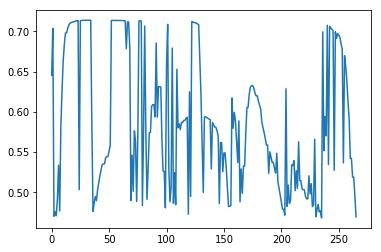

In [19]:
pyplot.plot(data)

In [20]:
image_expert = image_expert.as_matrix()
classification_rules = classification_rules.as_matrix()

In [21]:
sp = np.zeros(classification_rules.shape[0]).astype("bool")
sp[0] = True
sp2 = np.ones(classification_rules.shape[0]).astype("bool")
majority_votes = stats.mode(classification_rules[sp])[0]
sum(majority_votes[0] == image_expert[0])

6034

In [22]:
stats.mode(classification_rules[(sp)])

ModeResult(mode=array([[ 1.,  1.,  1., ...,  1.,  1.,  3.]]), count=array([[1, 1, 1, ..., 1, 1, 1]]))

In [23]:
image_expert

array([[ 1.,  1.,  1., ...,  3.,  3.,  3.]])

In [24]:
classification_rules[sp.astype("bool")]

array([[ 1.,  1.,  1., ...,  1.,  1.,  3.]])

In [25]:
stats.mode(classification_rules[sp.astype("bool")])[0]

array([[ 1.,  1.,  1., ...,  1.,  1.,  3.]])

In [26]:
def objective_function(population):
    scores = np.zeros(population.shape[0])
    for i, specimen in enumerate(population):
        majority_votes = stats.mode(classification_rules[specimen.astype("bool")])[0]
        scores[i] = sum(majority_votes[0] == image_expert[0])
    return scores

In [27]:
pop = np.array((sp, sp2))

In [28]:
objective_function(pop)

array([ 6034.,  7962.])

In [29]:
def iterations_limit(max_iterations):
    def stop_iteration(_, best_specimens):
        current_iteration = len(best_specimens)
        return current_iteration >= max_iterations
    return stop_iteration

In [30]:
model, best_specimens = pbil(objective_function, 300, 266, iterations_limit(5),
                             0.01, 0.05, 0.01)

In [31]:
model

array([ 0.51489901,  0.48539502,  0.49500099,  0.50500099,  0.50460498,
        0.50994902,  0.49539502,  0.49965694,  0.49500099,  0.48539502,
        0.50519602,  0.49490199,  0.50005098,  0.49539502,  0.50480398,
        0.49509801,  0.50480398,  0.49034603,  0.49024998,  0.51450498,
        0.49509801,  0.48985594,  0.50470398,  0.49500099,  0.50500099,
        0.49510099,  0.50509801,  0.49500099,  0.48519801,  0.50519602,
        0.49480398,  0.49510099,  0.50470398,  0.49529602,  0.50509801,
        0.49519801,  0.49494953,  0.50470398,  0.50519602,  0.49480398,
        0.50499901,  0.50490199,  0.49509801,  0.52450498,  0.50509801,
        0.50945893,  0.49985002,  0.52450498,  0.49544257,  0.49995098,
        0.50470398,  0.52450498,  0.50489901,  0.48529602,  0.50499901,
        0.51489901,  0.51965397,  0.50975594,  0.48529602,  0.51489901,
        0.49510099,  0.50470398,  0.47549502,  0.49529602,  0.50994902,
        0.50490199,  0.50014998,  0.47549502,  0.50489901,  0.48

In [32]:
best_specimens

array([[False, False,  True, ...,  True, False, False],
       [ True, False, False, ..., False,  True,  True],
       [ True, False, False, ..., False,  True,  True],
       [ True,  True,  True, ...,  True,  True, False],
       [ True, False, False, ..., False, False,  True]], dtype=bool)

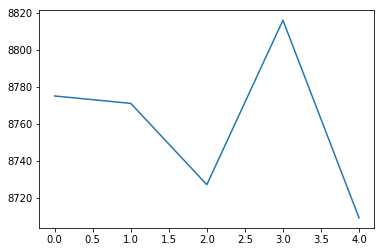

In [33]:
pyplot.plot(population_evaluation(best_specimens, objective_function))

In [35]:
model, best_specimens = pbil(objective_function, 300, 266, iterations_limit(1000),
                             0.01, 0.05, 0.01)

In [36]:
model

array([ 0.56827881,  0.85002242,  0.71395559,  0.86454945,  0.02399722,
        0.64903288,  0.44740631,  0.62087089,  0.47328943,  0.69276153,
        0.20723426,  0.39088359,  0.33073622,  0.40985307,  0.27145502,
        0.32801242,  0.558193  ,  0.30448804,  0.28776062,  0.29611227,
        0.38788135,  0.13059438,  0.09706187,  0.21664286,  0.28299754,
        0.16650879,  0.34341131,  0.236241  ,  0.22385512,  0.28335517,
        0.24512882,  0.24686333,  0.14997365,  0.13484884,  0.32573402,
        0.4500822 ,  0.56488249,  0.65288223,  0.77531084,  0.03265069,
        0.72826227,  0.74079852,  0.48136653,  0.92764549,  0.48402407,
        0.53539089,  0.82322884,  0.17870642,  0.68182614,  0.69297715,
        0.69605682,  0.87308819,  0.15336548,  0.1951174 ,  0.14407134,
        0.21281758,  0.17230265,  0.14149374,  0.28800355,  0.18402601,
        0.14670386,  0.23723505,  0.09038857,  0.16343819,  0.15878733,
        0.15736215,  0.39477295,  0.23267338,  0.43047872,  0.70

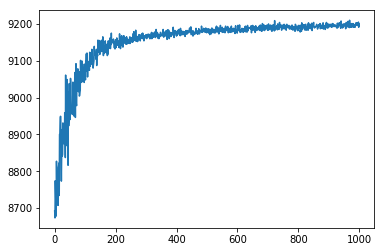

In [37]:
pyplot.plot(population_evaluation(best_specimens, objective_function))